In [33]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [34]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [35]:
def model(t_u, w,b):
    return w* t_u+b

In [36]:
def loss_fn(t_p,t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [37]:
w= torch.ones(())
b=torch.zeros(())

In [38]:
t_p = model(t_u,w,b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [39]:
loss = loss_fn(t_p,t_c)
loss

tensor(1763.8846)

In [40]:
x= torch.ones(())
y= torch.ones(3,1)
z= torch.ones(1,3)
a= torch.ones(2,1,1)
print(f"shapes: x: {x.shape}, y: {y.shape}, z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1]), z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [41]:
delta = 0.1

In [42]:

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [43]:
learning_rate = 1e-2

w= w- learning_rate * loss_rate_of_change_w

In [44]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u,w,b+delta),t_c) - 
    loss_fn(model(t_u,w,b+delta),t_c)) / (2.0 * delta)

b = b- learning_rate * loss_rate_of_change_b

In [52]:
def dloss_fn(t_p,t_c):
    dsg_diffs = 2*(t_p - t_c) / t_p.size(0)
    return dsg_diffs

In [53]:
def dmodel_dw(t_p,w,b):
    return t_u

In [54]:
def dmodel_db(t_p,w,b):
    return 1.0

In [55]:

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])
    

In [56]:

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [57]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [58]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884644
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2969,   82.6000])
Epoch 2, Loss 5802485.500000
    Params: tensor([2568.4014,   45.1637])
    Grad:   tensor([-261257.4219,   -4598.9712])
Epoch 3, Loss 19408035840.000000
    Params: tensor([-148527.7344,   -2616.3933])
    Grad:   tensor([15109614.0000,   266155.7188])
...
Epoch 10, Loss 90901154706620645225508955521810432.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [59]:

training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884644
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2969,   82.6000])
Epoch 2, Loss 323.090546
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4667,  16.5122])
...
Epoch 10, Loss 29.105242
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022669
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [60]:
t_un = 0.1 * t_u

In [61]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([8.7614, 0.1064])
    Grad:   tensor([-776.1403,  -10.6400])
Epoch 2, Loss 1256.923340
    Params: tensor([-29.2369,  -0.5934])
    Grad:   tensor([3799.8267,   69.9809])
Epoch 3, Loss 29506.498047
    Params: tensor([156.9804,   2.6574])
    Grad:   tensor([-18621.7227,   -325.0807])
...
Epoch 10, Loss 135534412300288.000000
    Params: tensor([-10486460.0000,   -184766.4688])
    Grad:   tensor([1.2627e+09, 2.2247e+07])
Epoch 11, Loss 3253982382260224.000000
    Params: tensor([51382104.0000,   905326.3750])
    Grad:   tensor([-6.1869e+09, -1.0901e+08])
...


tensor([5.6720e+18, 9.9938e+16])

In [62]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params

Epoch 1, Loss 80.364342
Epoch 2, Loss 1256.923340
Epoch 3, Loss 29506.498047
...
Epoch 10, Loss 135534412300288.000000
Epoch 11, Loss 3253982382260224.000000
...


tensor([5.6720e+18, 9.9938e+16])

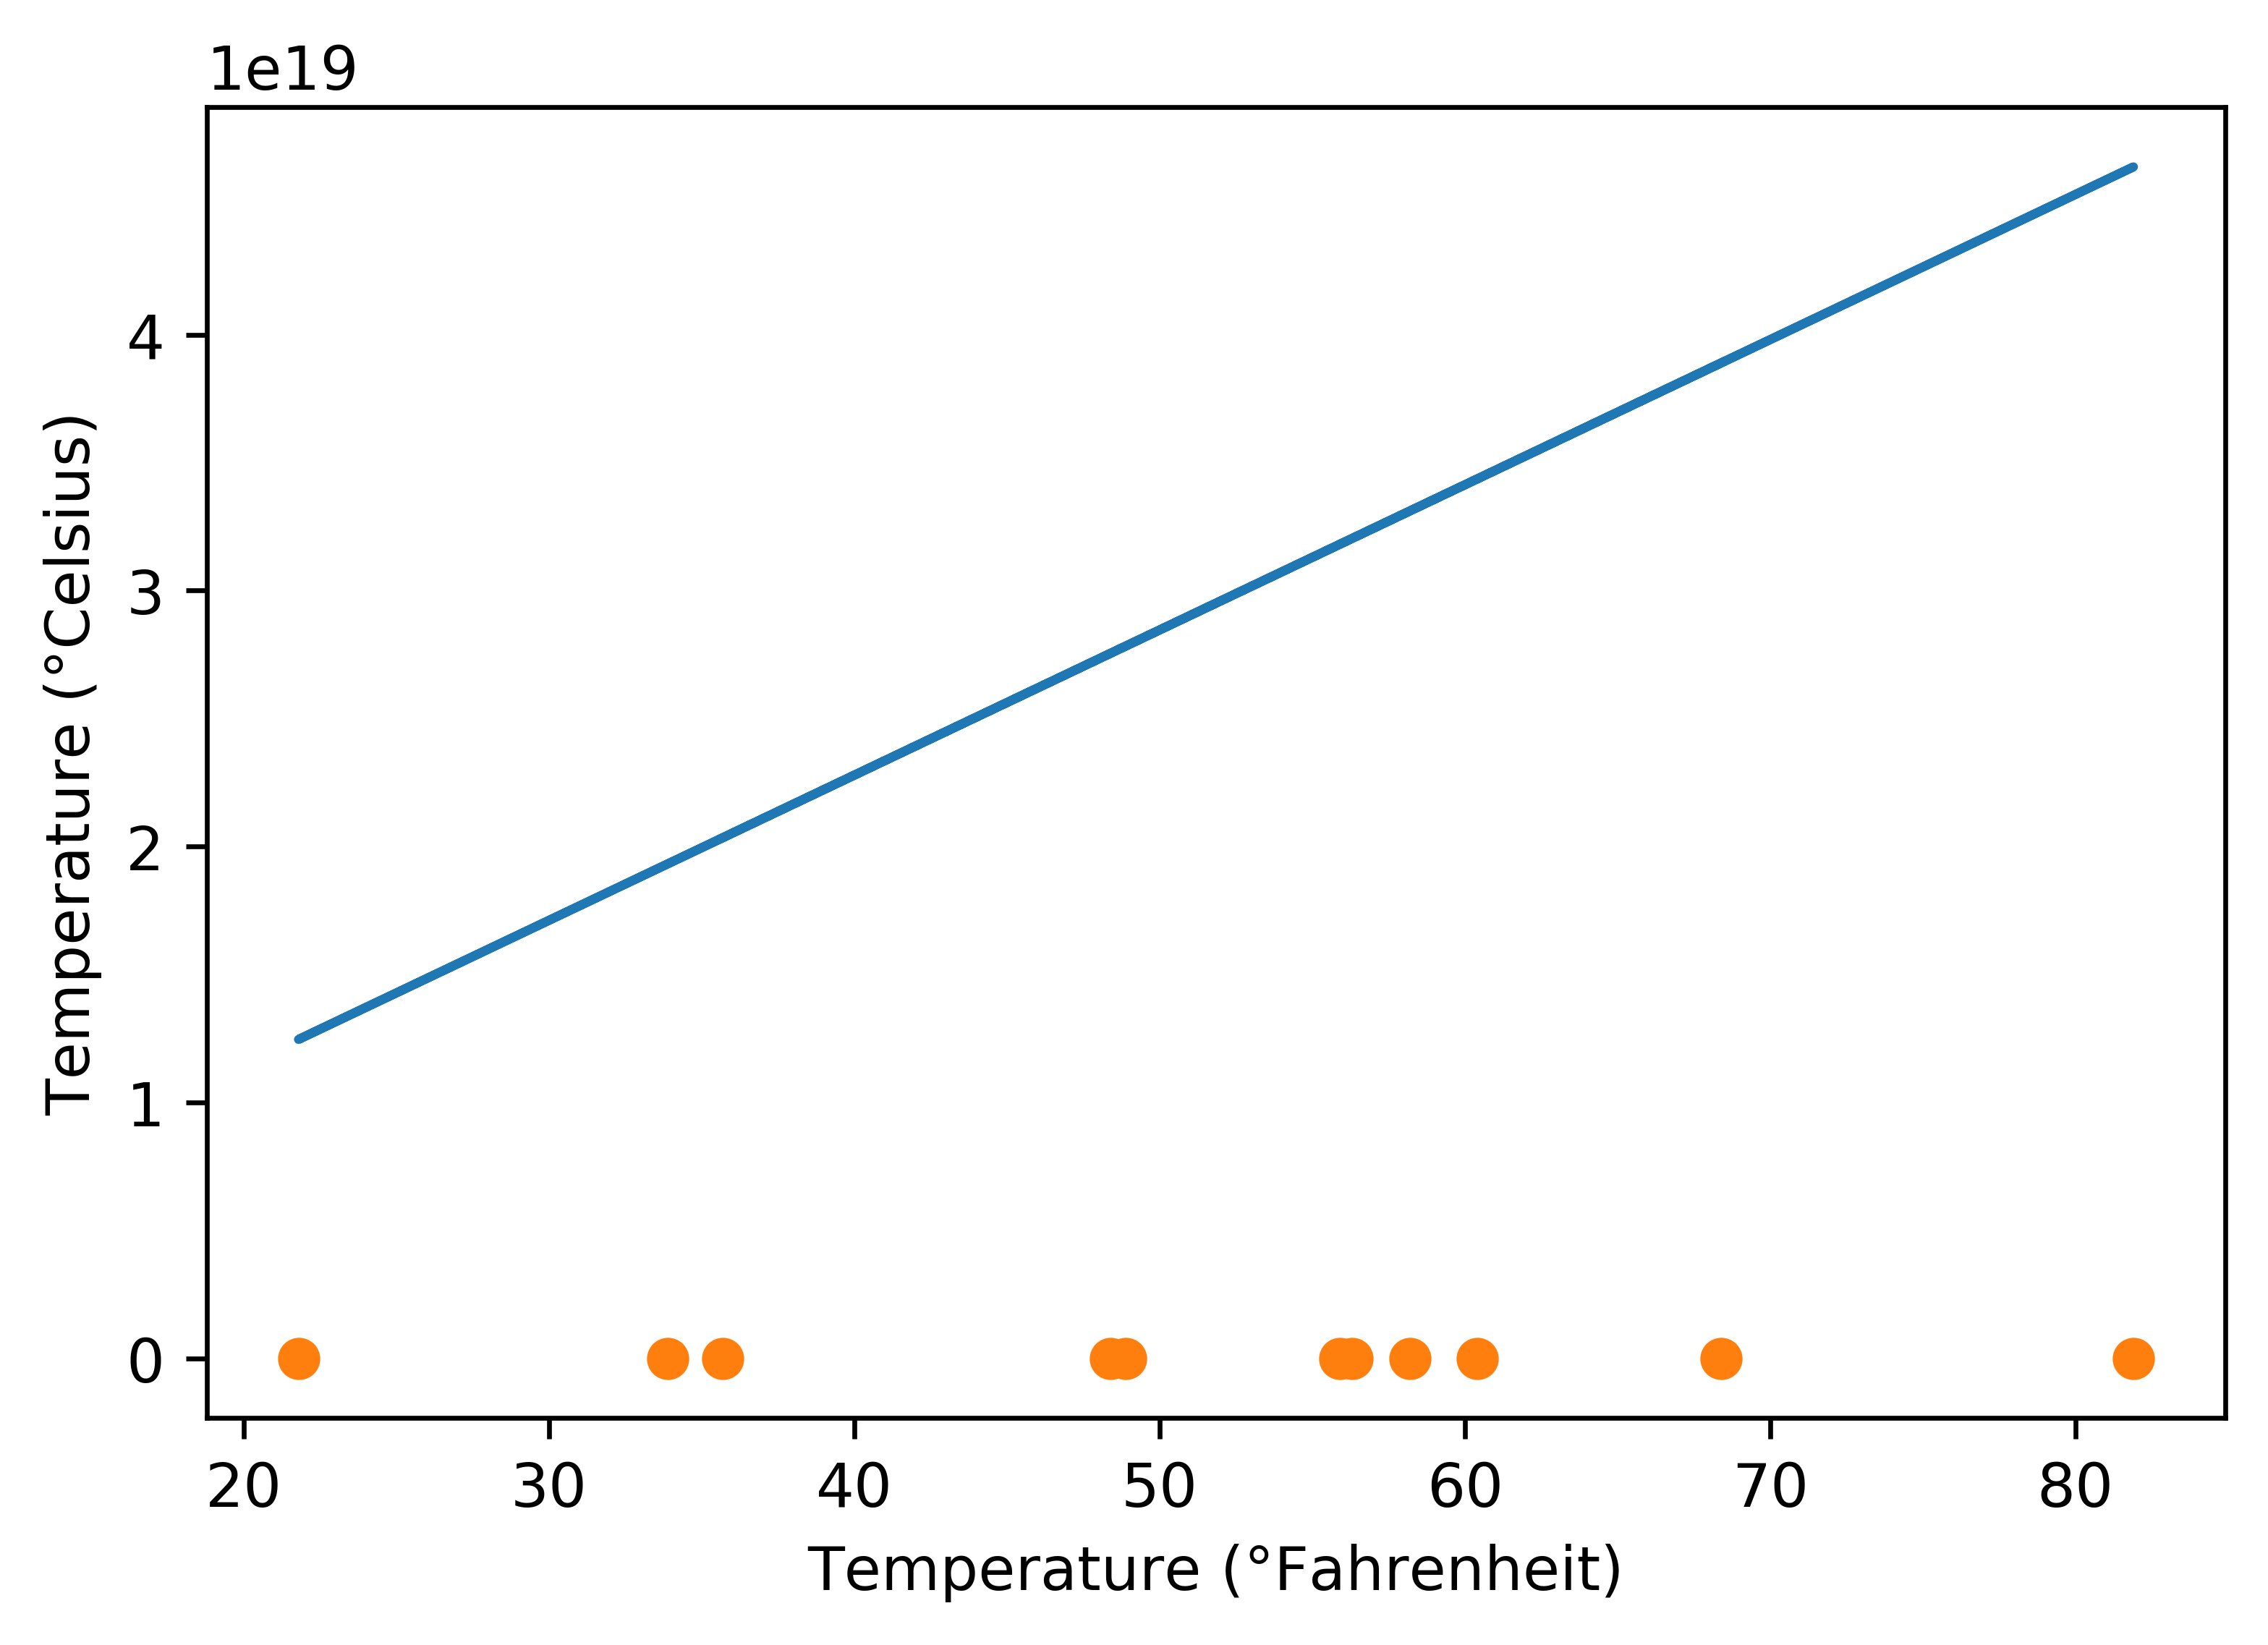

In [63]:

%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

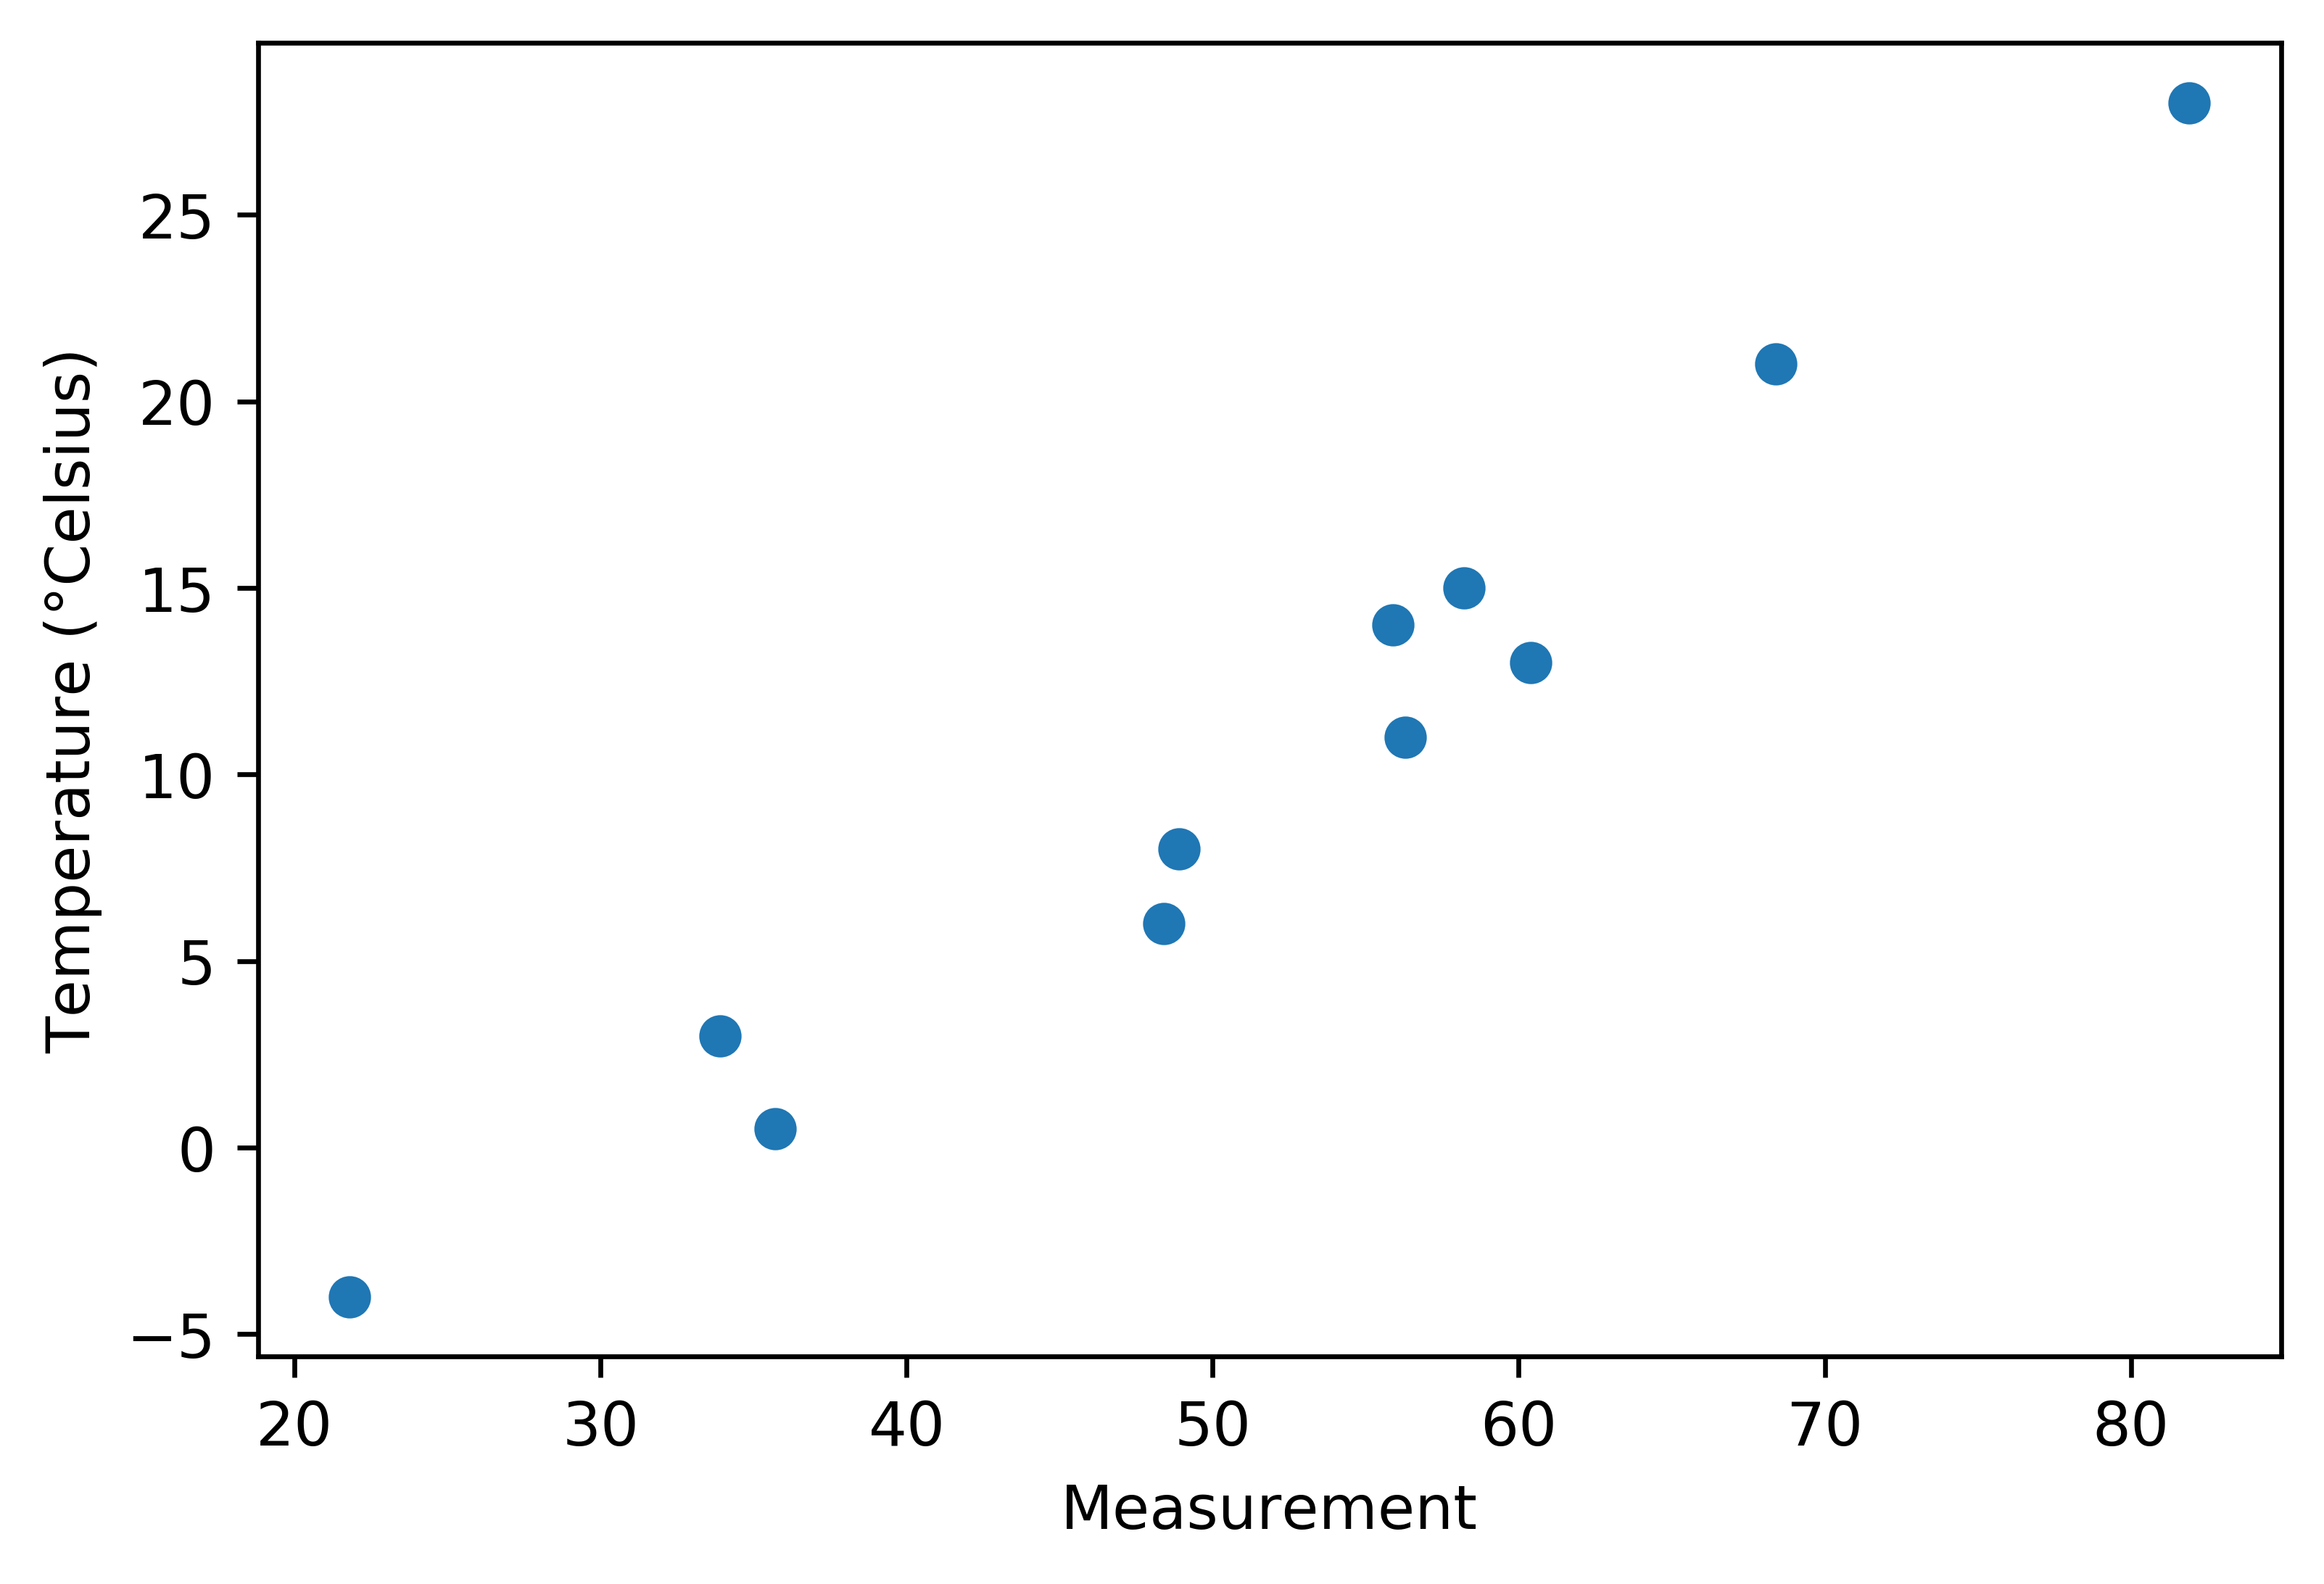

In [64]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")